In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist
tf.get_logger().setLevel('ERROR')

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# create the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile, train, and save model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)
model.save('handwritten.model.keras')

Epoch 1/3


2025-09-09 21:39:55.664669: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9226 - loss: 0.2648
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9660 - loss: 0.1105
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9766 - loss: 0.0753


Image 1: This digit is probably a 2 (confidence: 99.3%)


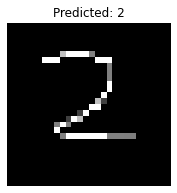

Image 2: This digit is probably a 4 (confidence: 100.0%)


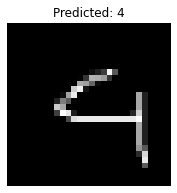

Image 3: This digit is probably a 9 (confidence: 98.2%)


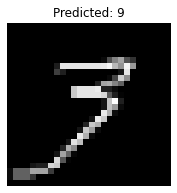

Image 4: This digit is probably a 9 (confidence: 96.3%)


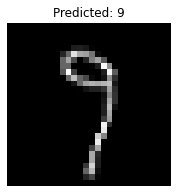

Image 5: This digit is probably a 4 (confidence: 91.6%)


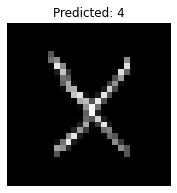

Image 6: This digit is probably a 8 (confidence: 42.1%)


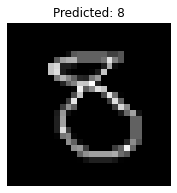

Image 7: This digit is probably a 3 (confidence: 96.5%)


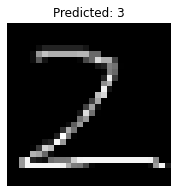

Image 8: This digit is probably a 3 (confidence: 75.5%)


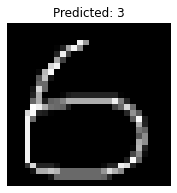

Image 9: This digit is probably a 5 (confidence: 78.1%)


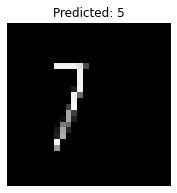

Image 10: This digit is probably a 9 (confidence: 87.9%)


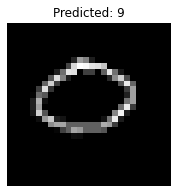

Image 11: This digit is probably a 3 (confidence: 58.4%)


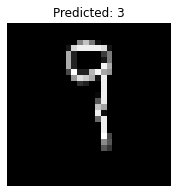

Image 12: This digit is probably a 5 (confidence: 63.9%)


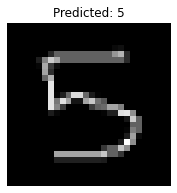

Image 13: This digit is probably a 4 (confidence: 82.0%)


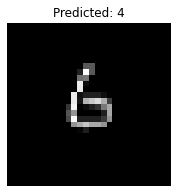

Image 14: This digit is probably a 2 (confidence: 55.3%)


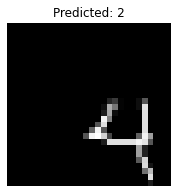

Image 15: This digit is probably a 2 (confidence: 99.9%)


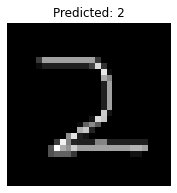

Image 16: This digit is probably a 8 (confidence: 100.0%)


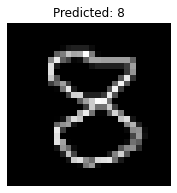

Image 17: This digit is probably a 5 (confidence: 98.6%)


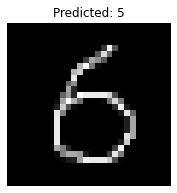

Image 18: This digit is probably a 8 (confidence: 97.4%)


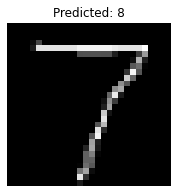

Image 19: This digit is probably a 3 (confidence: 99.2%)


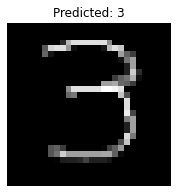

Image 20: This digit is probably a 8 (confidence: 44.7%)


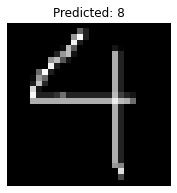

Image 21: This digit is probably a 7 (confidence: 42.2%)


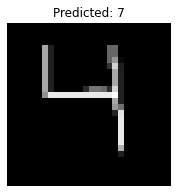

Image 22: This digit is probably a 4 (confidence: 96.8%)


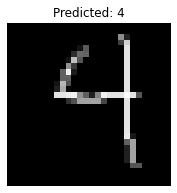

In [2]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


# Load your model
model = tf.keras.models.load_model('handwritten.model.keras')

image_number = 1
while os.path.isfile(f"./daves-test-numbers/digit_{image_number}.png"):
    try:
        # Read the image in grayscale
        img = cv2.imread(f"./daves-test-numbers/digit_{image_number}.png", cv2.IMREAD_GRAYSCALE)

        # Check if image was loaded successfully
        if img is None:
            print(f"Could not load digit_{image_number}.png")
            image_number += 1
            continue

        # Resize to 28x28 if needed (MNIST standard)
        if img.shape != (28, 28):
            img = cv2.resize(img, (28, 28))

        # Normalize to 0-1 range
        img = img.astype(np.float32) / 255.0

        # Invert if needed (MNIST has white digits on black background)
        # Check if digit appears to be dark on light background
        if np.mean(img) > 0.5:
            img = 1.0 - img

        # Reshape for model input: (1, 28, 28, 1) for typical CNN models
        img_reshaped = img.reshape(1, 28, 28, 1)

        # Make prediction
        prediction = model.predict(img_reshaped, verbose=0)
        predicted_digit = np.argmax(prediction)
        confidence = np.max(prediction) * 100

        print(f"Image {image_number}: This digit is probably a {predicted_digit} (confidence: {confidence:.1f}%)")

        # Display the image
        plt.figure(figsize=(3, 3))
        plt.imshow(img, cmap='gray')
        plt.title(f"Predicted: {predicted_digit}")
        plt.axis('off')
        plt.show()

        image_number += 1

    except Exception as e:
        print(f"Error processing digit_{image_number}.png: {e}")
        image_number += 1